In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lib import ClassWrap
from lib import general_methods as gm
%matplotlib inline

#Each run is an instance of PyHEG
run = ClassWrap.PyHEG(rs=3.0, ndim=3, Nk=5)

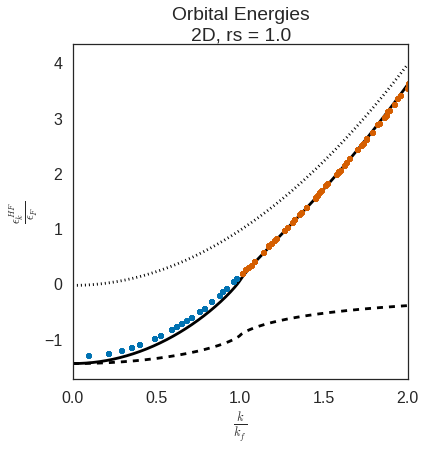

/home/evan/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


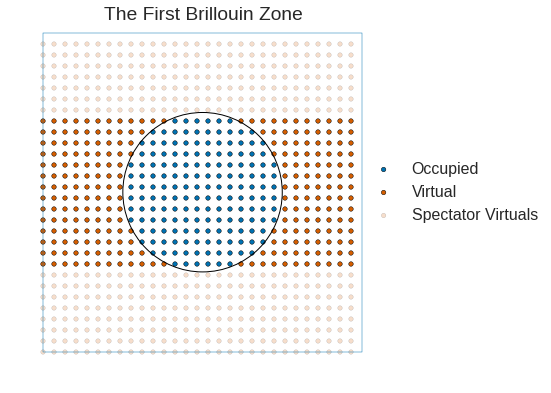

In [2]:
run.Nk = 30 
run.ndim = 2
run.rs = 1.0
sns.set_palette('colorblind')
sns.set_style('white')
sns.set_context('poster')
run.get_resulting_params()
figlen = 6
fig = plt.figure(figsize=(figlen,figlen))
run.plot_energy()
plt.show()
#fig = plt.figure(figsize=(figlen,figlen))
#run.plot_exc_hist()
#plt.show()
fig = plt.figure(figsize=(figlen,figlen))
run.plot_1stBZ()
plt.show()

In [3]:
import sys
run.Nk = 10
run.ndim = 2
run.get_resulting_params()
print "Nexc = ", run.Nexc
print "Nocc = ", run.Nocc
print "Nvir = ", run.Nvir
print "Symm = ", np.all(np.isclose(run.mattest.T, run.mattest))
print "Mv is working? ", run.mv_is_working()
guess = np.asfortranarray(np.eye(2*run.Nexc, 5))
run.davidson(guess, blocksize=5)
print run.dav_vals
print np.linalg.eigh(run.mattest)[0]

Nexc =  80
Nocc =  16
Nvir =  20
Symm =  True
Mv is working?  True
[ 0.25480053  0.25480053  0.60365139  0.60365139  0.79012346  0.7901243
  0.81077909  0.82200765  0.89178421  0.89871565  0.90314735  0.9321731
  0.95227776  0.95816444  0.97258721  0.97553518  0.98964528  0.99475706
  0.99530483  0.99573062  1.0139726   1.03242428  1.04281024  1.04544035
  1.05979802  1.05983779  1.05986304  1.07851277  1.08056453  1.08850672
  1.42286486  1.82135048  1.87243924  2.10759409  2.26017366  2.26950743
  2.61966113  2.638955    2.64695465  2.70369207  2.76765809  2.80825199
  2.87728706  3.29098306  3.66999374  4.20694378]
[ 0.25480053  0.25480053  0.60365139  0.60365139  0.79012346  0.79012346
  0.81077909  0.81077909  0.89178421  0.89178421  0.90314735  0.90314735
  0.93053143  0.93053143  0.95112889  0.95112889  0.95964645  0.95964645
  0.97481272  0.97481272  0.98594026  0.98594026  0.99475706  0.99475706
  0.99573062  0.99573062  1.03356087  1.03356087  1.04258792  1.04258792
  1.05979